In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
results = np.load('../tmp/reinforce_study.npy')

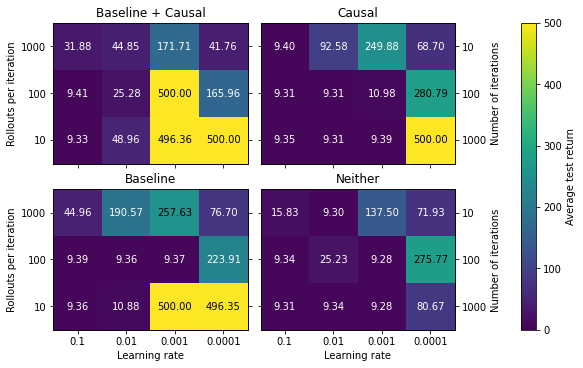

In [4]:
n_rollouts = [10, 100, 1000]
learning_rate = [0.1, 0.01, 0.001, 0.0001]
titles = ['Baseline + Causal', 'Causal', 'Baseline', 'Neither']

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True, figsize=(8, 5))
for i in range(2):
    for j in range(2):
        im = ax[i, j].pcolormesh(results[i, j, :, :, 1], cmap='viridis', vmin=0, vmax=500, rasterized=True)
        ax[i, j].set_title(titles[i * 2 + j])
        ax2 = ax[i, j].twinx()
        ax2.pcolormesh(results[i, j, :, :, 1], cmap='viridis', vmin=0, vmax=500, rasterized=True)
        for x in range(len(n_rollouts)):
            for y in range(len(learning_rate)):
                t = results[i, j, x, y, 1]
                ax2.text(y + 0.5, x + 0.5, f"{t:.2f}", ha='center', va='center', color='w' if t < 250 else 'k')
        ax2.set_yticks(np.arange(len(n_rollouts)) + 0.5)
        ax2.set_yticklabels([])
    ax[-1, i].set_xlabel("Learning rate")
    ax[-1, i].set_xticks(np.arange(len(learning_rate)) + 0.5)
    ax[-1, i].set_xticklabels(learning_rate)
    ax[i, 0].set_ylabel("Rollouts per iteration")
    ax[i, 0].set_yticks(np.arange(len(n_rollouts)) + 0.5)
    ax[i, 0].set_yticklabels(n_rollouts)
    ax2.set_ylabel("Number of iterations")
    ax2.set_yticklabels(10_000 // np.array(n_rollouts))
fig.colorbar(im, ax=ax, label="Average test return")

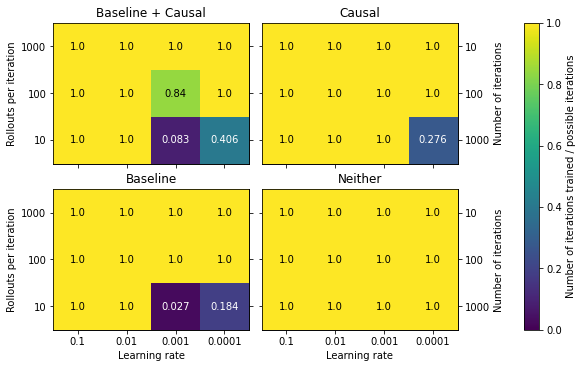

In [5]:
n_rollouts = [10, 100, 1000]
learning_rate = [0.1, 0.01, 0.001, 0.0001]
titles = ['Baseline + Causal', 'Causal', 'Baseline', 'Neither']

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True, figsize=(8, 5))
for i in range(2):
    for j in range(2):
        im = ax[i, j].pcolormesh(results[i, j, :, :, 0]/(10_000 // np.array(n_rollouts)[:, None]), cmap='viridis', vmin=0, vmax=1, rasterized=True)
        ax[i, j].set_title(titles[i * 2 + j])
        ax2 = ax[i, j].twinx()
        ax2.pcolormesh(results[i, j, :, :, 0]/(10_000 // np.array(n_rollouts)[:, None]), cmap='viridis', vmin=0, vmax=1, rasterized=True)
        for x in range(len(n_rollouts)):
            for y in range(len(learning_rate)):
                t = results[i, j, x, y, 0]/(10_000 // n_rollouts[x])
                ax2.text(y + 0.5, x + 0.5, t, ha='center', va='center', color='w' if t < 0.5 else 'k')
        ax2.set_yticks(np.arange(len(n_rollouts)) + 0.5)
        ax2.set_yticklabels([])
    ax[-1, i].set_xlabel("Learning rate")
    ax[-1, i].set_xticks(np.arange(len(learning_rate)) + 0.5)
    ax[-1, i].set_xticklabels(learning_rate)
    ax[i, 0].set_ylabel("Rollouts per iteration")
    ax[i, 0].set_yticks(np.arange(len(n_rollouts)) + 0.5)
    ax[i, 0].set_yticklabels(n_rollouts)
    ax2.set_ylabel("Number of iterations")
    ax2.set_yticklabels(10_000 // np.array(n_rollouts))
fig.colorbar(im, ax=ax, label="Number of iterations trained / possible iterations")